## Importing the Libraries and Dataset:

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset

In [34]:
df = pd.read_csv("OnlineNewsPopularity.csv")
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## Data cleaning

Checking how many rows and columns we have:

In [35]:
df.shape

(39644, 61)

In [36]:
print(df.columns)

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

Feature names have starting spaces

In [37]:
df.columns = df.columns.str.strip()

We have 39644 datapoints which were discribed using 64 features.

check the types and missing values:

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

The above results shows:
* There are no missing values
* except for url, all the feature are numerical.

In [39]:
_binary_features = ['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world','weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend']
for f in _binary_features:
    df[f] = df[f].astype('bool')
df['data_channel_is_entertainment']

0         True
1        False
2        False
3         True
4        False
         ...  
39639    False
39640    False
39641    False
39642    False
39643     True
Name: data_channel_is_entertainment, Length: 39644, dtype: bool

In [40]:
_int_features = ['n_tokens_title','n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords']
for f in _int_features:
    df[f] = df[f].astype('int64')
df['n_tokens_title']

0        12
1         9
2         9
3         9
4        13
         ..
39639    11
39640    12
39641    10
39642     6
39643    10
Name: n_tokens_title, Length: 39644, dtype: int64

drop non-predictive feature to avoid overfitting.

In [41]:
df = df.drop(columns=['url', 'timedelta'])

In [42]:
# remove noise from n_tokens_content. those equals to 0
df  = df[df['n_tokens_content'] != 0]
print ("After noise removal - ",df.shape)
print(df['n_non_stop_words'].describe())
# Comment - Visualizing the n_non_stop_words data field shows that the present of a record with 1042 value, 
# futher observation of that data shows that it belongs to entertainment which is not actually. It belongs to world news or others.
# this particluar also contains 0 on a lot of attributes. This record is classifed as a noise and will be remove.
df = df[df['n_non_stop_words'] != 1042]
df.drop(labels=['n_non_stop_words'], axis = 1, inplace=True)

After noise removal -  (38463, 59)
count    38463.000000
mean         1.027065
std          5.307978
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name: n_non_stop_words, dtype: float64


## EDA and Feature Engineering

Let's take a look at different statistical measures for our dataset.

In [43]:
numerical_columns = [col for col in df.columns if col != 'shares' and df[col].dtype in ['int64', 'float64']]

In [44]:
# Merging the weekdays columns channels as one single column
publishdayMerge=df[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday','weekday_is_sunday']]
temp_arr=[]
for r in list(range(publishdayMerge.shape[0])):
    for c in list(range(publishdayMerge.shape[1])):
        if ((c==0) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Monday')
        elif ((c==1) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Tueday')
        elif ((c==2) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Wednesday')
        elif ((c==3) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Thursday')
        elif ((c==4) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Friday')
        elif ((c==5) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Saturday') 
        elif ((c==6) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Sunday')
            
# Merging the data channels as one single column
DataChannelMerge=df[['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus',
                        'data_channel_is_socmed','data_channel_is_tech','data_channel_is_world']]
#logic to merge data channel
DataChannel_arr=[]
for r in list(range(DataChannelMerge.shape[0])):
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0) and ((DataChannelMerge.iloc[r,5])==0)):
        DataChannel_arr.append('Others')
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Lifestyle')
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Entertainment')
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Business')
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Social Media')
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Tech')
        elif ((c==5) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('World')

In [45]:
# merge the the new data into the dataframe
df.insert(loc=11, column='weekdays', value=temp_arr)
df.insert(loc=12, column='data_channel', value=DataChannel_arr)

# Now I drop the old data
df.drop(labels=['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus',
                        'data_channel_is_socmed','data_channel_is_tech','data_channel_is_world', 
                 'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday','weekday_is_sunday'], axis = 1, inplace=True)
print(df.shape)

(38462, 47)


In [46]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12,219,0.663594,0.815385,4,2,1,0,4.680365,5,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9,255,0.604743,0.791946,3,1,1,0,4.913725,4,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9,211,0.575130,0.663866,3,1,1,0,4.393365,6,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9,531,0.503788,0.665635,9,0,1,0,4.404896,7,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13,1072,0.415646,0.540890,19,19,20,0,4.682836,7,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [47]:
df['kw_range'] = df['kw_max_max'] - df['kw_min_min']
df['avg_keyword_shares'] = (df['kw_avg_min'] + df['kw_avg_max'] + df['kw_avg_avg']) / 3

# LDA Topic Features
dominant_topic_columns = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']
df['dominant_topic_distance'] = df[dominant_topic_columns].apply(lambda row: row.sum() - row.max(), axis=1)

# Polarity Features
df['polarity_difference'] = df['avg_positive_polarity'] - df['avg_negative_polarity']
df['polarity_range'] = df['global_subjectivity'] - df['avg_positive_polarity']

# Interaction Features
df['hrefs_imgs_interaction'] = df['num_hrefs'] * df['num_imgs']
df['sentiment_subjectivity_interaction'] = df['global_sentiment_polarity'] * df['global_subjectivity']

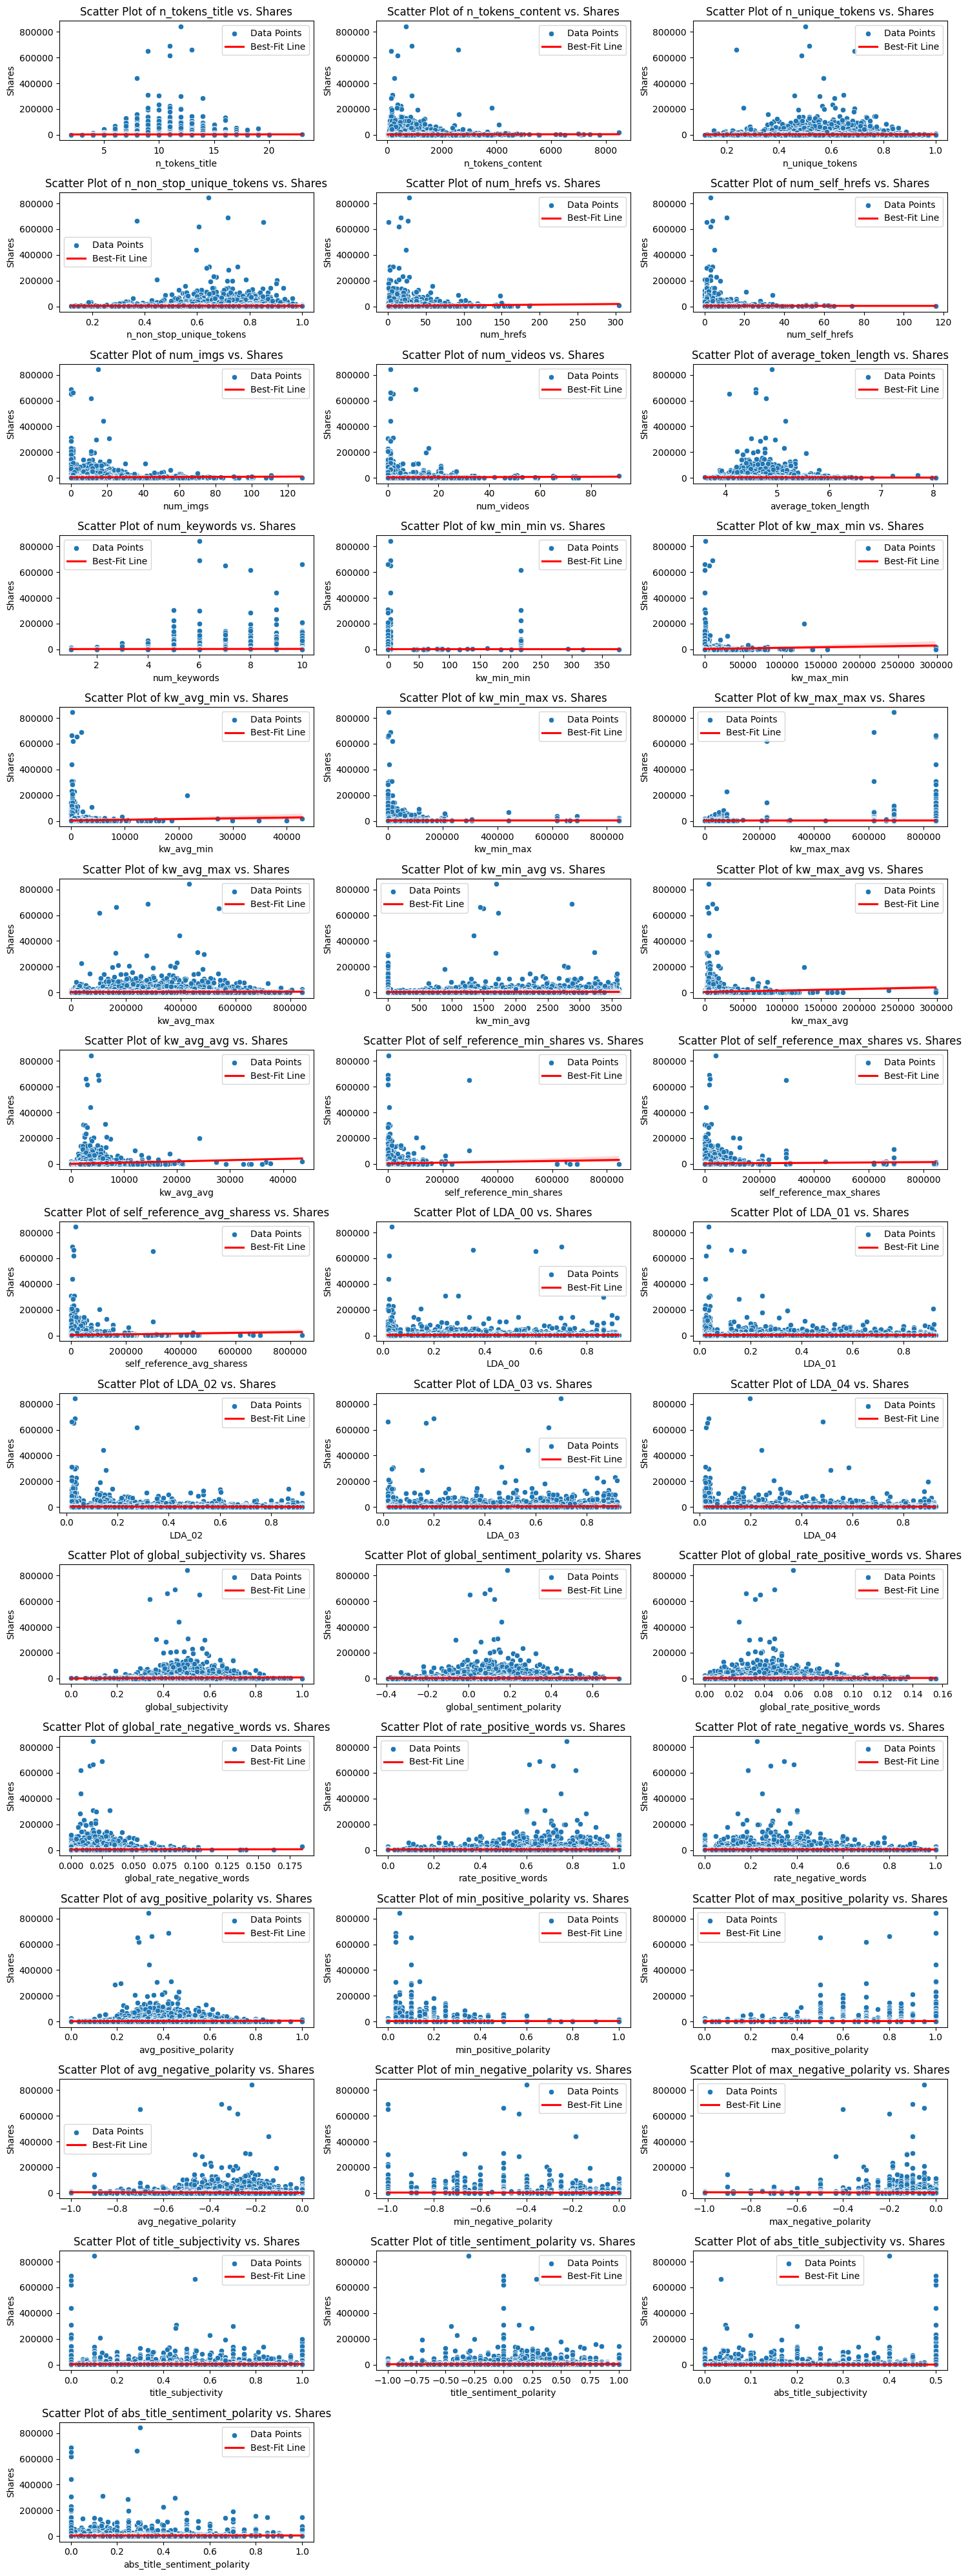

In [48]:
# Set the desired color for the best-fit line
line_color = 'red'  # Replace with your desired color

# Arrange scatter plots in 3 columns
num_columns_per_row = 3
num_rows = (len(numerical_columns) + num_columns_per_row - 1) // num_columns_per_row

fig, axes = plt.subplots(num_rows, num_columns_per_row, figsize=(15, 40))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(numerical_columns):
    row = i // num_columns_per_row
    col = i % num_columns_per_row
    
    sns.scatterplot(data=df, x=numerical_columns[i], y='shares', ax=axes[row, col], label='Data Points')
    sns.regplot(data=df, x=numerical_columns[i], y='shares', scatter=False, color=line_color, ax=axes[row, col], label='Best-Fit Line')
    axes[row, col].set_title(f"Scatter Plot of {numerical_columns[i]} vs. Shares")
    axes[row, col].set_xlabel(numerical_columns[i])
    axes[row, col].set_ylabel('Shares')
    axes[row, col].legend()

# Remove any empty subplots
for i in range(len(numerical_columns), num_rows * num_columns_per_row):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [49]:
booelan_columns = [col for col in df.columns if col != 'shares' and df[col].dtype in ['bool']]
df[booelan_columns] = df[booelan_columns].astype('int64')

In [50]:
categorical_columns = [col for col in df.columns if col != 'shares' and df[col].dtype in ['object']]

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit and transform the categorical column
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

<Axes: >

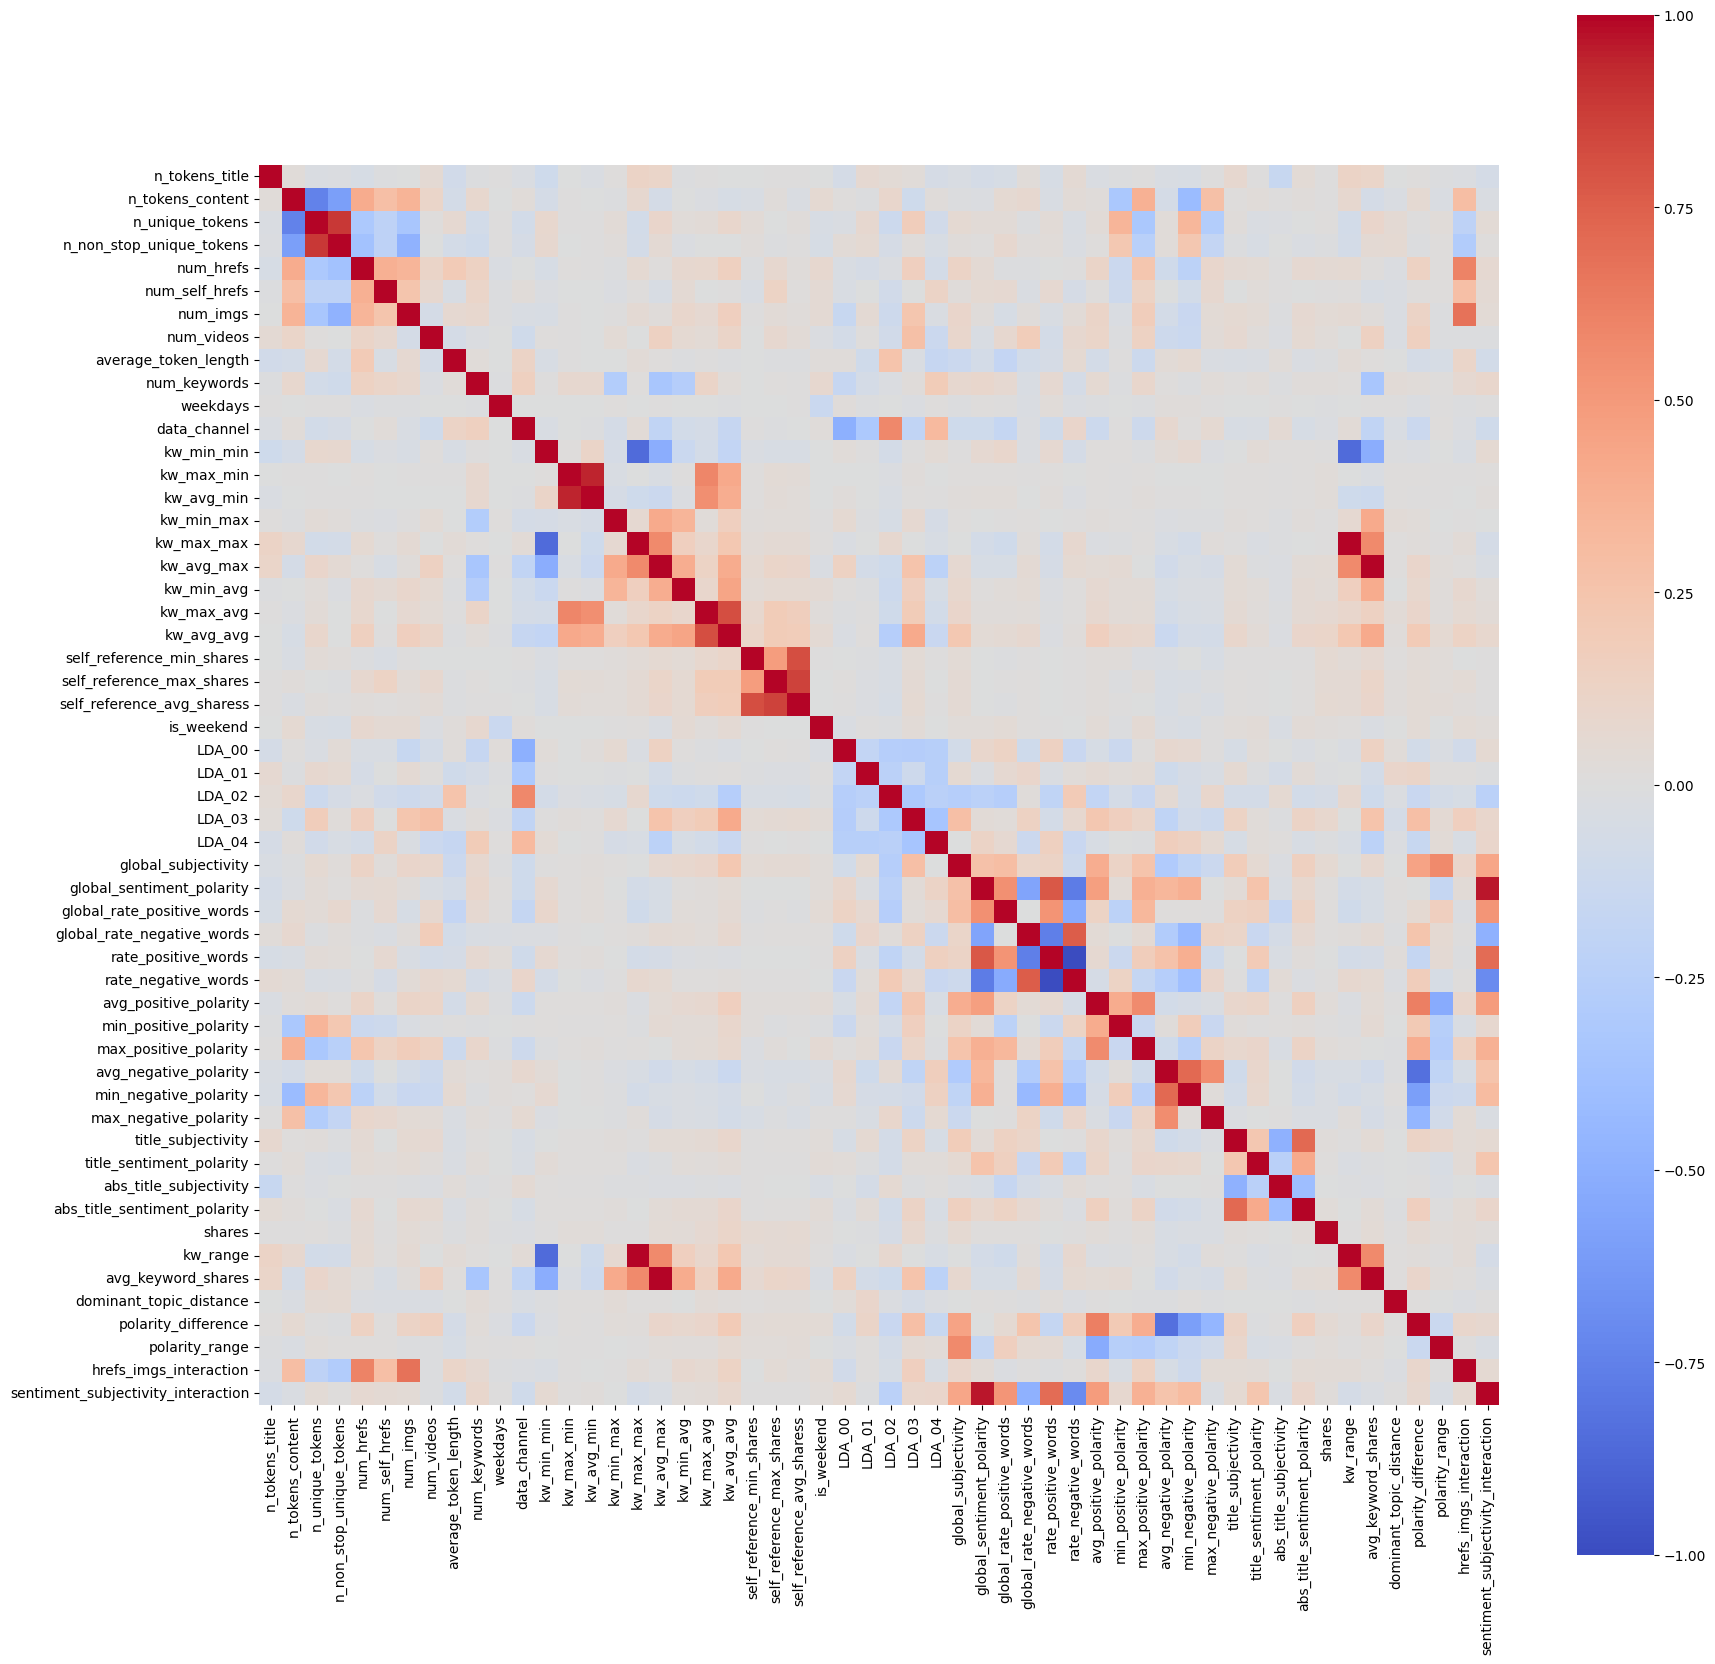

In [51]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),square = True, cmap='coolwarm', vmin=-1, vmax=1)

precentage of news published on weekend

<Axes: >

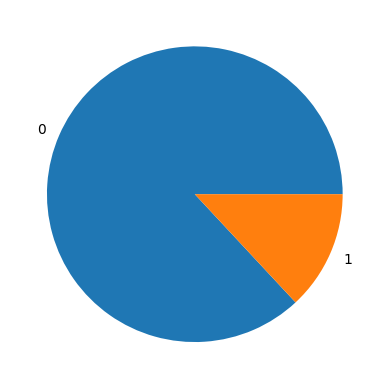

In [52]:
df.groupby('is_weekend').size().plot(kind='pie')

how the news are spread in different topics

<Figure size 1200x800 with 0 Axes>

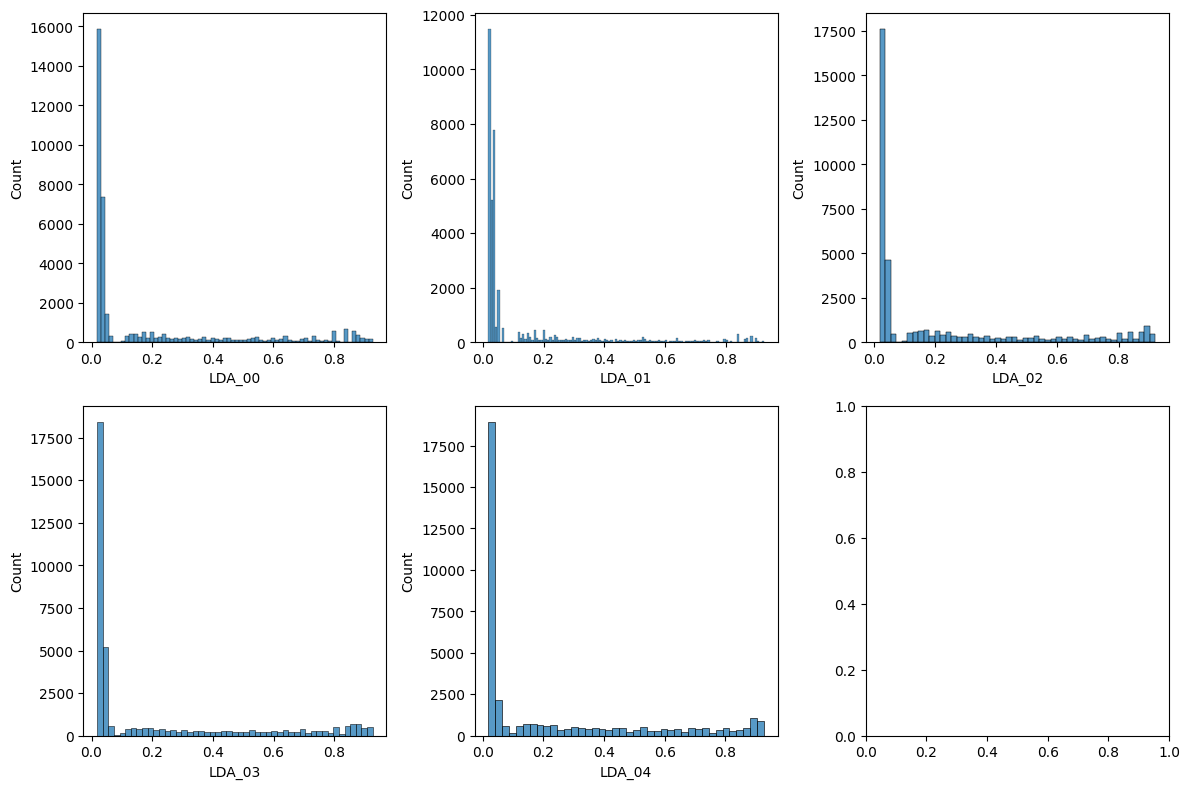

In [53]:
data_columns = ["LDA_00", "LDA_01", "LDA_02", "LDA_03", "LDA_04"]
num_rows = 2
num_cols = 3

plt.figure(figsize=(12, 8))

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8))
axs = axs.flatten()  # Flatten the array of axes

for idx, col in enumerate(data_columns):
    if idx < len(axs):
        sns.histplot(data=df, x=col, kde=False, ax=axs[idx])
    else:
        # Hide the extra subplots beyond the available data columns
        axs[idx - 1].axis('off')

plt.tight_layout()

plt.show()

## Data Preprocessing

### Removing the outliers

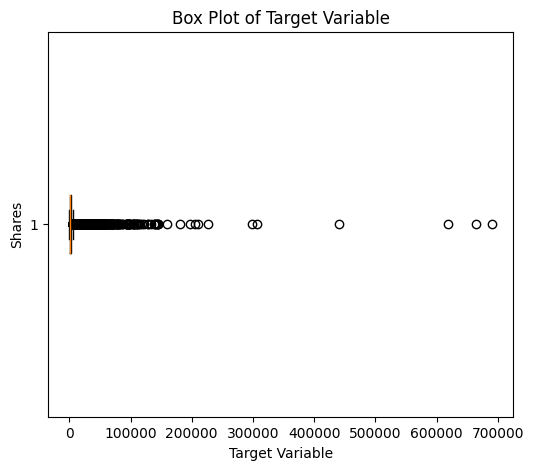

In [54]:
# Create a box plot
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

plt.figure(figsize=(6, 5))
plt.boxplot(train_df['shares'], vert=False)

plt.title('Box Plot of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Shares')

plt.show()

In [55]:
X_val = val_df.drop(columns=['shares'])  
y_val = val_df['shares'] 
from scipy import stats

def remove_outliers_target_variable(data, target_column, threshold=3):
    Q1 = data[target_column].quantile(0.25)
    Q3 = data[target_column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    cleaned_data = data[(data[target_column] >= lower_bound) & (data[target_column] <= upper_bound)]
    
    return cleaned_data

df_no_outliers = remove_outliers_target_variable(train_df, target_column='shares')
print(f"No. of Outliers: {train_df.shape[0] - df_no_outliers.shape[0]}")

No. of Outliers: 2181


### Feature Selection

In [56]:
X, y = df_no_outliers.drop(columns=['shares']), df_no_outliers['shares']

correlation_matrix = df.corr()
corr_with_target = correlation_matrix['shares'].abs().sort_values(ascending=False)
important_features_corr = corr_with_target[corr_with_target > 0.001].index.tolist()
important_features_corr.remove('shares')  

X = df_no_outliers[important_features_corr]
X_val = val_df[important_features_corr]

important_features_corr

['kw_avg_avg',
 'LDA_03',
 'kw_max_avg',
 'global_subjectivity',
 'self_reference_avg_sharess',
 'LDA_02',
 'self_reference_min_shares',
 'num_hrefs',
 'polarity_difference',
 'self_reference_max_shares',
 'avg_negative_polarity',
 'num_imgs',
 'avg_keyword_shares',
 'kw_avg_max',
 'kw_min_avg',
 'hrefs_imgs_interaction',
 'kw_avg_min',
 'avg_positive_polarity',
 'kw_max_min',
 'polarity_range',
 'abs_title_sentiment_polarity',
 'min_negative_polarity',
 'max_positive_polarity',
 'num_videos',
 'max_negative_polarity',
 'title_subjectivity',
 'num_keywords',
 'data_channel',
 'sentiment_subjectivity_interaction',
 'is_weekend',
 'LDA_04',
 'global_rate_negative_words',
 'title_sentiment_polarity',
 'average_token_length',
 'global_rate_positive_words',
 'weekdays',
 'global_sentiment_polarity',
 'n_unique_tokens',
 'n_non_stop_unique_tokens',
 'LDA_01',
 'n_tokens_content',
 'kw_max_max',
 'kw_range',
 'n_tokens_title',
 'dominant_topic_distance',
 'min_positive_polarity',
 'kw_min_max

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=79)

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [59]:
def model_evaluation(model, X_test = X_test, X_val = X_val):
    y_pred = model.predict(X_test)
    y_pred_val = model.predict(X_val)

    # Print metrics
    print("For Test dataset: ")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    print(f"R-squared: {r2_score(y_test, y_pred)}")
    print("\nFor Validation dataset: ")
    print(f'Mean absolute error: {mean_absolute_error(y_val, y_pred_val)}')
    print(f'R-squared: {r2_score(y_val, y_pred_val)}')

## Model Training

### Assesing the dataset

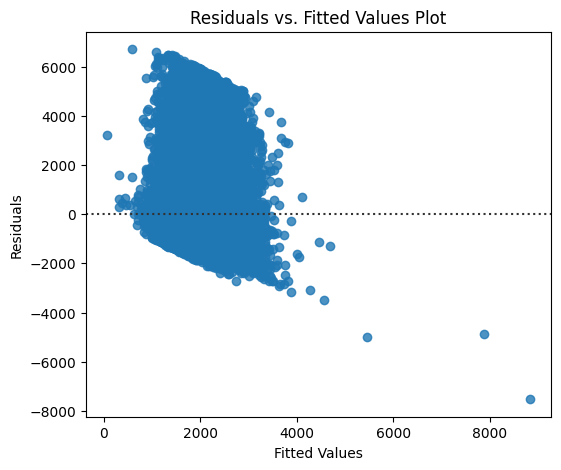

In [60]:
import statsmodels.api as sm
# Fit the linear regression model
Xs = sm.add_constant(X)
model = sm.OLS(y, Xs).fit()

# Residuals vs. Fitted Values Plot
plt.figure(figsize=(6, 5))
sns.residplot(x=model.fittedvalues, y=model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values Plot')
plt.show()


In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     61.69
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:02:57   Log-Likelihood:            -2.4789e+05
No. Observations:               28588   AIC:                         4.959e+05
Df Residuals:                   28540   BIC:                         4.963e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                867.4834    613.069      1.415      0.157    -334.160    2069.127
kw_avg_avg                             0.4660      0.020     22.875      0.000       0.426       0.506
LDA_03                                35.8435    126.425      0.284      0.777    -211.956     283.643
kw_max_avg                            -0.0647      0.004    -17.765      0.000      -0.072      -0.058
global_subjectivity                  252.5571    108.483      2.328      0.020      39.925     465.189
self_reference_avg_sharess             0.0019      0.002      1.255      0.209      -0.001       0.005
LDA_02                              -309.9789    129.439     -2.395      0.017    -563.686     -56.272
self_reference_min_shares             -0.0002      0.001     -0.186      0.853      -0.002       0.002
num_hrefs                              5.8700      1.150      5.104      0.000       3.616       8.124
polarity_difference                   76.2092     73.605      1.035      0.300     -68.059     220.478
self_reference_max_shares              0.0002      0.001      0.399      0.690      -0.001       0.001
avg_negative_polarity                -12.9399    134.136     -0.096      0.923    -275.853     249.974
num_imgs                               1.7699      1.746      1.014      0.311      -1.652       5.192
avg_keyword_shares                     0.0631      0.012      5.225      0.000       0.039       0.087
kw_avg_max                            -0.0215      0.004     -5.345      0.000      -0.029      -0.014
kw_min_avg                            -0.0551      0.011     -4.955      0.000      -0.077      -0.033
hrefs_imgs_interaction                -0.0553      0.047     -1.178      0.239      -0.147       0.037
kw_avg_min                            -0.2551      0.046     -5.514      0.000      -0.346      -0.164
avg_positive_polarity                 63.2693    119.771      0.528      0.597    -171.487     298.026
kw_max_min                             0.0323      0.009      3.762      0.000       0.015       0.049
polarity_range                       189.2877     87.597      2.161      0.031      17.593     360.982
abs_title_sentiment_polarity         -95.7008     58.290     -1.642      0.101    -209.951      18.550
min_negative_polarity                 36.1648     65.519      0.552      0.581     -92.256     164.586
max_positive_polarity               -190.8941     61.587     -3.100      0.002    -311.608     -70.180
num_videos                             2.6739      2.375      1.126      0.260      -1.981       7.329
max_negative_polarity                -26.2362    149.572     -0.175      0.861    -319.404     266.932
title_subjectivity                    98.6945     38.219      2.582      0.010      23.784     1

### Linear Regression Model

In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
model_evaluation(lr)

For Test dataset: 
Mean Absolute Error: 1001.2896295142532
R-squared: 0.0905189705149726

For Validation dataset: 
Mean absolute error: 2637.6202605046797
R-squared: -0.007547577623091106


### Lasso Regression Model

In [63]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
model_evaluation(lasso)

For Test dataset: 
Mean Absolute Error: 1001.5113966058971
R-squared: 0.09118447283940612

For Validation dataset: 
Mean absolute error: 2639.872670174117
R-squared: -0.007751066716328747


Overall, eventhough Lasso regression had better result, the performance gain is marginal and so, both model have similar performance.

### Effect of polynominal features

In [64]:
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial features
degree = 2  # Degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_val_poly = poly.transform(X_val)

# Fit a linear regression model to the polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

model_evaluation(poly_reg, X_test_poly, X_val_poly)

For Test dataset: 
Mean Absolute Error: 1019.4936166491781
R-squared: -0.0010932835896819704

For Validation dataset: 
Mean absolute error: 2653.256076953074
R-squared: -0.007135323938790128


The error after adding polynominal features increased, meaning the model got overfitted.

### Random Forest Regression Model

In [65]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)
model_evaluation(rf_reg, X_test, X_val)

For Test dataset: 
Mean Absolute Error: 1028.056983210913
R-squared: 0.07211407354274613

For Validation dataset: 
Mean absolute error: 2642.776339529443
R-squared: -0.005245405392902747


### XGboost Regression Model

In [66]:
gb_reg = GradientBoostingRegressor(n_estimators=100)
gb_reg.fit(X_train, y_train)
model_evaluation(gb_reg, X_test, X_val)

For Test dataset: 
Mean Absolute Error: 979.5412013685784
R-squared: 0.10937601338406389

For Validation dataset: 
Mean absolute error: 2614.8695476777193
R-squared: -0.0068478861806069435


## Model Optimization

### Hyperparameter tuning

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 8],
}

grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)

best_gbr = grid_search.best_estimator_
model_evaluation(best_gbr, X_test, X_val)

## Compare Model Performance

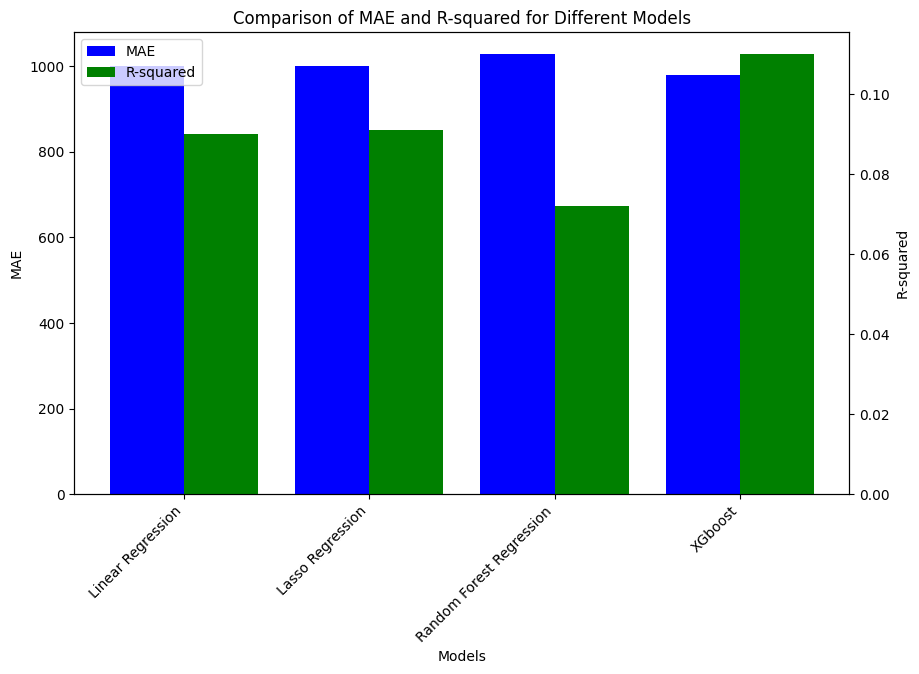

In [68]:
def plot_metrics_bar(models, model_names, mae_scores, r2_scores):
    num_models = len(models)
    x = np.arange(num_models) 

    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.bar(x - 0.2, mae_scores, width=0.4, label='MAE', color='b')
    ax1.set_xlabel('Models')
    ax1.set_ylabel('MAE')
    ax1.set_xticks(x)
    ax1.set_xticklabels(model_names, rotation=45, ha='right')

    ax2 = ax1.twinx()
    ax2.bar(x + 0.2, r2_scores, width=0.4, label='R-squared', color='g')
    ax2.set_ylabel('R-squared')

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.title('Comparison of MAE and R-squared for Different Models')
    plt.show()

models = [lr,lasso,rf_reg, gb_reg]
model_names = ['Linear Regression','Lasso Regression','Random Forest Regression', 'XGboost']
mae_scores = [1001.28,1001.51, 1028, 979.54] 
r2_scores = [0.090,0.091, 0.072, 0.11]

plot_metrics_bar(models, model_names, mae_scores, r2_scores)

### Conclusion

* XGboost regression model has outperformed other models. 